# 전자신문 기사 내용을 활용하여 Chunk 생성

In [15]:
import site
site.getsitepackages()

['C:\\ProgramData\\anaconda3',
 'C:\\ProgramData\\anaconda3\\Lib\\site-packages']

In [12]:
# 라이브러리 경로 인식 문제, 
import sys
print(sys.executable)
print(sys.path)
sys.path.append('c:\\users\\dmlql\\appdata\\roaming\\python\\python311\\site-packages')

C:\ProgramData\anaconda3\python.exe
['C:\\Users\\dmlql\\KT_AIVLE\\Project\\증시 상황 요약 LLM Chat bot', 'C:\\ProgramData\\anaconda3\\python311.zip', 'C:\\ProgramData\\anaconda3\\DLLs', 'C:\\ProgramData\\anaconda3\\Lib', 'C:\\ProgramData\\anaconda3', '', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\Pythonwin']


In [13]:
print(sys.path)

['C:\\Users\\dmlql\\KT_AIVLE\\Project\\증시 상황 요약 LLM Chat bot', 'C:\\ProgramData\\anaconda3\\python311.zip', 'C:\\ProgramData\\anaconda3\\DLLs', 'C:\\ProgramData\\anaconda3\\Lib', 'C:\\ProgramData\\anaconda3', '', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\Pythonwin', 'c:\\users\\dmlql\\appdata\\roaming\\python\\python311\\site-packages']


### 1. 라이브러리 불러오기

In [4]:
!pip install feedparser
!pip install newspaper3k
!pip install konlpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [54]:
import feedparser  # rss 에서 xml 정보 추출
from newspaper import Article  # 인터넷 신문 기사 분석
from konlpy.tag import Okt  # 한국어 자연어 처리/형태소 분석기 

import json

In [43]:
import os
os.getcwd()

'C:\\Users\\dmlql\\KT_AIVLE\\Project\\증시 상황 요약 LLM Chat bot'

In [57]:
WORK_DIR = 'C:/Users/dmlql/KT_AIVLE/Project/증시 상황 요약 LLM Chat bot/'

### 2. RSS 파일 돌아다니며 기사의 제목/link를 추출
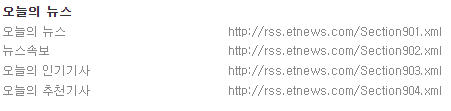

In [25]:
feedparser.parse(urls[0])['entries'][0]

{'title': '주성엔지니어링, 반도체 사업 인적분할…“글로벌 경쟁력 강화”',
 'title_detail': {'type': 'text/plain',
  'language': None,
  'base': 'https://rss.etnews.com/Section901.xml',
  'value': '주성엔지니어링, 반도체 사업 인적분할…“글로벌 경쟁력 강화”'},
 'links': [{'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://www.etnews.com/20240502000433'}],
 'link': 'https://www.etnews.com/20240502000433',
 'summary': '주성엔지니어링이 반도체 사업 부문을 분리, 신설 법인으로 설립한다. 기존 디스플레이와 태양광 사업과 독립적으로 운영해 반도체 사업 경쟁력을 키우고 기업 가치를 높이기 위해서다. 주성엔지니어링은 2일 이사회를 개최하고 이같은 사안을 결정했다. 회사 관계자는 “반도체와 태',
 'summary_detail': {'type': 'text/html',
  'language': None,
  'base': 'https://rss.etnews.com/Section901.xml',
  'value': '주성엔지니어링이 반도체 사업 부문을 분리, 신설 법인으로 설립한다. 기존 디스플레이와 태양광 사업과 독립적으로 운영해 반도체 사업 경쟁력을 키우고 기업 가치를 높이기 위해서다. 주성엔지니어링은 2일 이사회를 개최하고 이같은 사안을 결정했다. 회사 관계자는 “반도체와 태'},
 'authors': [{'name': '권동준'}],
 'author': '권동준',
 'author_detail': {'name': '권동준'},
 'id': 'https://rss.etnews.com/20240502000433',
 'guidislink': False,
 'comments': 'https://www.etnews.co

In [17]:
urls = ["http://rss.etnews.com/Section901.xml",  
        "http://rss.etnews.com/Section902.xml",
        "http://rss.etnews.com/Section903.xml",
        "http://rss.etnews.com/Section904.xml"]

# 아래 함수는 RSS목록의 list안에 존재한느 모든 기사의 title, link를 list로 구성
def crawl_rss(urls):
    array_rss = []  # 여기메 모든 기사 채울 것
    title_set = set()  # 중복 기사 제거하기 위함
    for url in urls:
        print("[Crawl URL]", url)
        parse_rss = feedparser.parse(url)  # 현재 url을 파싱한 후에 결과를 저장
        for p in parse_rss.entries:  # parse_rss에 있는 모든 entries/기사를 검색
            if p.title in title_set :
                print("Duplicated Article", p.title)
                continue
            array_rss.append({'title':p.title, 'link':p.link})
            title_set.add(p.title)
    return array_rss

list_articles = crawl_rss(urls)
print(list_articles)

[Crawl URL] http://rss.etnews.com/Section901.xml
[Crawl URL] http://rss.etnews.com/Section902.xml
Duplicated Article 주성엔지니어링, 반도체 사업 인적분할…“글로벌 경쟁력 강화”
Duplicated Article 'PA 간호사' 법제화 속도…이르면 이달 중 간호법 제정 전망
Duplicated Article KISA, 침해사고 분석 전문기업 지정한다…급증한 사이버 침해사고 대응
[Crawl URL] http://rss.etnews.com/Section903.xml
[Crawl URL] http://rss.etnews.com/Section904.xml
Duplicated Article 주성엔지니어링, 반도체 사업 인적분할…“글로벌 경쟁력 강화”
Duplicated Article 'PA 간호사' 법제화 속도…이르면 이달 중 간호법 제정 전망
Duplicated Article KISA, 침해사고 분석 전문기업 지정한다…급증한 사이버 침해사고 대응
Duplicated Article 윤영빈 우주항공청장 내정자 “민간중심·글로벌 5대 우주항공 강국으로 도약”
Duplicated Article [국가 바이오벨트 꿈꾸는 강원]〈하〉바이오 국가첨단 특화단지의 시작, 강원특별자치도
Duplicated Article “전기차 캐즘은 단기 영향…기회로 삼아야”...국제 e모빌리티 엑스포 조직위·전자신문 주관
Duplicated Article OECD, 韓 성장률 전망 2.6%로 상향…“반도체 수출 회복에 0.4%P ↑”
Duplicated Article [클릭!이 차]BMW 뉴 iX2, 쿠페형 차체에 전기로 달린다
Duplicated Article 1분기 국내 의약품 시장, '의정 갈등' 여파에도 성장 지속
Duplicated Article [카&테크]토요타 '멀티 패스웨이' 핵심 전고체 배터리
Duplicated Article [르포]'전기차에 슈퍼카 DNA 심다' 마세라티, 이탈리아 모데

In [165]:
list_articles[0]

{'title': '주성엔지니어링, 반도체 사업 인적분할…“글로벌 경쟁력 강화”',
 'link': 'https://www.etnews.com/20240502000433',
 'content': "주성엔지니어링이 반도체 사업 부문을 분리, 신설 법인으로 설립한다. 기존 디스플레이와 태양광 사업과 독립적으로 운영해 반도체 사업 경쟁력을 키우고 기업 가치를 높이기 위해서다.\n\n\n\n주성엔지니어링은 2일 이사회를 개최하고 이같은 사안을 결정했다. 회사 관계자는 “반도체와 태양광·디스플레이 장비 사업을 분리해 경영효율성을 향상시키고 사업 경쟁력을 세계 1등으로 만들어 궁극적으로 기업가치 세계화를 실현하기로 했다”며 “이를 위해 각 사업부문별 독립·책임 경영을 위한 인적 및 물적분할을 추진하겠다”고 밝혔다.\n\n\n\n구체적으로 반도체 연구개발(R&D) 및 제조사업을 인적 분할해 '주성엔지니어링(가칭)'으로 신설할 예정이다. 존속법인은 투자·관리 사업을 담당하게 된다. 디스플레이와 태양광은 물적 분할해 신설법인 '주성에스디(가칭)'로 존속법인 자회사로 편입할 계획이다.\n\n\n\n이같은 결정은 사업별로 전문성과 정체성을 강화하기 위해서다. 지금까지 반도체·디스플레이·태양광이 함께 있으면서 사업별 시장 변화에 적극 대응하는데 한계가 있었다. 특히 반도체 경우, 원자층증착장비(ALD)의 글로벌 시장 공급을 앞두고 있고, 기존 메모리 중심에서 시스템 반도체까지 타깃 시장을 확장해야하는 만큼, 독립적인 운영으로 집중도를 높일 필요가 있었다. 인적 분할로 글로벌 반도체 기업으로서의 입지를 높이려는 전략으로 향후 재상장도 추진할 계획이다.\n\n\n\n또 존속법인을 통해 경영 효율성을 높여 핵심 사업 경쟁력과 투자 전문성 강화에 나선 계획이다. 주성엔지니어링 관계자는 “경영효율성과 지배구조의 투명성 증대는 물론 궁극적으로는 각 사업부문별 독립성과 책임경영 강화로 글로벌 기업으로 발돋움할 것”이라고 발혔다.\n\n\n\n회사는 1분기 경영실적도 함께 공시했다. 매출액은 5

### 3. article 들의 link를 돌아다니면서 본문 긁어오기
* list_articles
    - 'title'
    - 'link'

In [38]:
url = list_articles[1]['link']

In [42]:
a = Article(url)
a.download()
a.parse()
print('title : ',a.title)
a.text

title :  'PA 간호사' 법제화 속도…이르면 이달 중 간호법 제정 전망


"정부가 진료지원(PA) 간호사를 법제화하는 등 간호사의 업무 범위를 명확히 하는 '간호법' 제정에 속도를 낸다.\n\n\n\n2일 의료계에 따르면 보건복지부는 전날 국회 보건복지위원회 여야 간사단에 유의동·최연숙 국민의힘 의원과 고영인 더불어민주당 의원이 각각 발의한 간호 관련 3개 법안에 대한 수정안을 제출했다. 최근 발의된 간호 관련 3개 법안을 조율해 정부안을 제출한 것으로, 간호사의 업무 범위를 명확히 해 PA 간호사를 법제화하는 내용이 담겼다.\n\n3개 법안 모두 간호사의 지난해 4월 대통령 거부권 행사로 폐기된 간호법에서 문제가 됐던 '지역사회' 문구는 삭제됐고, 복지부도 이를 그대로 따랐다.\n\n\n\n앞서 폐기된 간호법에는 '모든 국민이 지역사회에 수준 높은 의료 혜택을 받도록 한다'는 목적 조항이 담겼는데, 의사들은 '지역사회'라는 표현이 간호사의 단독 개원을 허용하는 근거가 된다고 주장하며 크게 반발했다.\n\n\n\n이에 따라 복지부가 제출한 안에는 '지역사회'라는 문구 대신 보건의료기관, 학교, 산업현장 등 간호사들이 실제로 근무하는 장소가 열거됐다.\n\n\n\n간호사의 업무는 현행 의료법에 적시된 '의사의 지도하에 시행하는 진료의 보조'라는 내용을 그대로 가져오되, PA 간호사 법제화를 위한 규정이 마련됐다.\n\n\n\nPA 간호사를 포함한 전문간호사의 경우 자격을 인정받은 분야에서 의사의 포괄적 지도나 위임 하에 진료 지원 업무를 수행할 수 있도록 했다. 이로써 수정된 간호법이 제정되면 합법과 불법의 경계에서 의료행위를 지원·보조해왔던 PA 간호사가 제도권 안으로 편입될 전망이다.\n\n\n\n'전담 간호사' 또는 '임상 전담 간호사'라고도 부르는 PA 간호사는 현장에서 수술·검사·시술 등을 보조하는 역할을 맡으며 의사의 의료행위를 암암리에 일부 대신해왔다. 필수의료 기피 현상으로 의사 수가 부족해지자 2010년을 전후해 빠른 속도로 늘어났고, 현재 전국에 1만명 이상 활동하는 것으로 추정된다.\n\n\n\n정부는 PA 간호사

In [46]:
def crawl_article(url, language='ko'):
    print("[Crawl Article]", url)  # 현재 title과 text를 추출할 url을 프린트 해줌
    a = Article(url, language = language)  # Article을 사용하여 그 URL을 입력하고, 언어옵션지정(한글어기본), 결과를 a에 저장
    a.download()
    a.parse()
    return a.title, a.text  # a에 해당하는 title과 본문(text)을 출력한다.

In [160]:
# 몬문내용 저장
for article in list_articles:
    _, content = crawl_article(article['link'])
    article['content'] = content

list_articles
    

[Crawl Article] https://www.etnews.com/20240502000433
[Crawl Article] https://www.etnews.com/20240502000420
[Crawl Article] https://www.etnews.com/20240502000192
[Crawl Article] https://www.etnews.com/20240502000334
[Crawl Article] https://www.etnews.com/20240502000373
[Crawl Article] https://www.etnews.com/20240502000294
[Crawl Article] https://www.etnews.com/20240502000310
[Crawl Article] https://www.etnews.com/20240502000223
[Crawl Article] https://www.etnews.com/20240502000221
[Crawl Article] https://www.etnews.com/20240502000202
[Crawl Article] https://www.etnews.com/20240502000141
[Crawl Article] https://www.etnews.com/20240502000081
[Crawl Article] https://www.etnews.com/20240502000370
[Crawl Article] https://www.etnews.com/20240502000332
[Crawl Article] https://www.etnews.com/20240502000319
[Crawl Article] https://www.etnews.com/20240502000300
[Crawl Article] https://www.etnews.com/20240502000226
[Crawl Article] https://www.etnews.com/20240502000292
[Crawl Article] https://www.

[{'title': '주성엔지니어링, 반도체 사업 인적분할…“글로벌 경쟁력 강화”',
  'link': 'https://www.etnews.com/20240502000433',
  'content': "주성엔지니어링이 반도체 사업 부문을 분리, 신설 법인으로 설립한다. 기존 디스플레이와 태양광 사업과 독립적으로 운영해 반도체 사업 경쟁력을 키우고 기업 가치를 높이기 위해서다.\n\n\n\n주성엔지니어링은 2일 이사회를 개최하고 이같은 사안을 결정했다. 회사 관계자는 “반도체와 태양광·디스플레이 장비 사업을 분리해 경영효율성을 향상시키고 사업 경쟁력을 세계 1등으로 만들어 궁극적으로 기업가치 세계화를 실현하기로 했다”며 “이를 위해 각 사업부문별 독립·책임 경영을 위한 인적 및 물적분할을 추진하겠다”고 밝혔다.\n\n\n\n구체적으로 반도체 연구개발(R&D) 및 제조사업을 인적 분할해 '주성엔지니어링(가칭)'으로 신설할 예정이다. 존속법인은 투자·관리 사업을 담당하게 된다. 디스플레이와 태양광은 물적 분할해 신설법인 '주성에스디(가칭)'로 존속법인 자회사로 편입할 계획이다.\n\n\n\n이같은 결정은 사업별로 전문성과 정체성을 강화하기 위해서다. 지금까지 반도체·디스플레이·태양광이 함께 있으면서 사업별 시장 변화에 적극 대응하는데 한계가 있었다. 특히 반도체 경우, 원자층증착장비(ALD)의 글로벌 시장 공급을 앞두고 있고, 기존 메모리 중심에서 시스템 반도체까지 타깃 시장을 확장해야하는 만큼, 독립적인 운영으로 집중도를 높일 필요가 있었다. 인적 분할로 글로벌 반도체 기업으로서의 입지를 높이려는 전략으로 향후 재상장도 추진할 계획이다.\n\n\n\n또 존속법인을 통해 경영 효율성을 높여 핵심 사업 경쟁력과 투자 전문성 강화에 나선 계획이다. 주성엔지니어링 관계자는 “경영효율성과 지배구조의 투명성 증대는 물론 궁극적으로는 각 사업부문별 독립성과 책임경영 강화로 글로벌 기업으로 발돋움할 것”이라고 발혔다.\n\n\n\n회사는 1분기 경영실적도 함께 공시했다. 매출액

### 4. json 파일로 내용 저장

In [151]:
type(list_articles[0])

dict

In [153]:
content_file = WORK_DIR + 'articles.json'

with open(content_file, 'w', encoding='utf-8') as f:
    for article in list_articles:
        f.write(json.dumps(article, ensure_ascii=False))
        f.write('\n')

    

In [155]:
with open(content_file, 'r+', encoding='utf-8') as f:
    data = f.read()
    print(data)


{"title": "주성엔지니어링, 반도체 사업 인적분할…“글로벌 경쟁력 강화”", "link": "https://www.etnews.com/20240502000433", "content": "주성엔지니어링이 반도체 사업 부문을 분리, 신설 법인으로 설립한다. 기존 디스플레이와 태양광 사업과 독립적으로 운영해 반도체 사업 경쟁력을 키우고 기업 가치를 높이기 위해서다.\n\n\n\n주성엔지니어링은 2일 이사회를 개최하고 이같은 사안을 결정했다. 회사 관계자는 “반도체와 태양광·디스플레이 장비 사업을 분리해 경영효율성을 향상시키고 사업 경쟁력을 세계 1등으로 만들어 궁극적으로 기업가치 세계화를 실현하기로 했다”며 “이를 위해 각 사업부문별 독립·책임 경영을 위한 인적 및 물적분할을 추진하겠다”고 밝혔다.\n\n\n\n구체적으로 반도체 연구개발(R&D) 및 제조사업을 인적 분할해 '주성엔지니어링(가칭)'으로 신설할 예정이다. 존속법인은 투자·관리 사업을 담당하게 된다. 디스플레이와 태양광은 물적 분할해 신설법인 '주성에스디(가칭)'로 존속법인 자회사로 편입할 계획이다.\n\n\n\n이같은 결정은 사업별로 전문성과 정체성을 강화하기 위해서다. 지금까지 반도체·디스플레이·태양광이 함께 있으면서 사업별 시장 변화에 적극 대응하는데 한계가 있었다. 특히 반도체 경우, 원자층증착장비(ALD)의 글로벌 시장 공급을 앞두고 있고, 기존 메모리 중심에서 시스템 반도체까지 타깃 시장을 확장해야하는 만큼, 독립적인 운영으로 집중도를 높일 필요가 있었다. 인적 분할로 글로벌 반도체 기업으로서의 입지를 높이려는 전략으로 향후 재상장도 추진할 계획이다.\n\n\n\n또 존속법인을 통해 경영 효율성을 높여 핵심 사업 경쟁력과 투자 전문성 강화에 나선 계획이다. 주성엔지니어링 관계자는 “경영효율성과 지배구조의 투명성 증대는 물론 궁극적으로는 각 사업부문별 독립성과 책임경영 강화로 글로벌 기업으로 발돋움할 것”이라고 발혔다.\n\n\n\n회사는 1분기 경영실적도 함께 공시했다. 매출액은 566

In [164]:
with open(content_file, 'r+', encoding='utf-8') as f:
    for line in f:
        print(json.loads(line)['content'])
        print('='*100)

주성엔지니어링이 반도체 사업 부문을 분리, 신설 법인으로 설립한다. 기존 디스플레이와 태양광 사업과 독립적으로 운영해 반도체 사업 경쟁력을 키우고 기업 가치를 높이기 위해서다.



주성엔지니어링은 2일 이사회를 개최하고 이같은 사안을 결정했다. 회사 관계자는 “반도체와 태양광·디스플레이 장비 사업을 분리해 경영효율성을 향상시키고 사업 경쟁력을 세계 1등으로 만들어 궁극적으로 기업가치 세계화를 실현하기로 했다”며 “이를 위해 각 사업부문별 독립·책임 경영을 위한 인적 및 물적분할을 추진하겠다”고 밝혔다.



구체적으로 반도체 연구개발(R&D) 및 제조사업을 인적 분할해 '주성엔지니어링(가칭)'으로 신설할 예정이다. 존속법인은 투자·관리 사업을 담당하게 된다. 디스플레이와 태양광은 물적 분할해 신설법인 '주성에스디(가칭)'로 존속법인 자회사로 편입할 계획이다.



이같은 결정은 사업별로 전문성과 정체성을 강화하기 위해서다. 지금까지 반도체·디스플레이·태양광이 함께 있으면서 사업별 시장 변화에 적극 대응하는데 한계가 있었다. 특히 반도체 경우, 원자층증착장비(ALD)의 글로벌 시장 공급을 앞두고 있고, 기존 메모리 중심에서 시스템 반도체까지 타깃 시장을 확장해야하는 만큼, 독립적인 운영으로 집중도를 높일 필요가 있었다. 인적 분할로 글로벌 반도체 기업으로서의 입지를 높이려는 전략으로 향후 재상장도 추진할 계획이다.



또 존속법인을 통해 경영 효율성을 높여 핵심 사업 경쟁력과 투자 전문성 강화에 나선 계획이다. 주성엔지니어링 관계자는 “경영효율성과 지배구조의 투명성 증대는 물론 궁극적으로는 각 사업부문별 독립성과 책임경영 강화로 글로벌 기업으로 발돋움할 것”이라고 발혔다.



회사는 1분기 경영실적도 함께 공시했다. 매출액은 566억원, 당기순이익은 161억원을 기록했다고 밝혔는데, 이는 전년 동기 대비 매출은 17.6% 감소, 당기순이익은 54.8% 증가했다. 회사 관계자는 “이번 1분기 실적이 다소 부진한 것은 글로벌 경기침체와 함께 반도체 경기 회복의